In [44]:
# Well log Data Outlier Detection using [Python Porgramming Language] for Fisa Field, well B. 
# Created: 23/10/2021
# Remodified for Paper submission review - 25/07/2022
# Created by: Fisayo Fagbemi
# Following the 2021 SPWLA Conference - Andy McDonald

In [ ]:
#############################################
# Rules for removing [suppressing] outliers #
#############################################

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np
import seaborn as sns
import scipy

In [4]:
las = lasio.read("Well_B.las")

In [5]:
df2 = las.df().reset_index()
df2.describe()

,DEPT,CAL,DT,RHOB,VSH,LLD,NPHI,GR
count,6181.000000,4701.000000,5765.000000,5099.000000,4627.000000,5783.000000,3842.000000,5645.000000
mean,6446.000000,10.684091,106.711312,2.041632,0.309673,49.124654,0.260560,65.092757
std,892.222669,0.915736,10.073077,0.141557,0.339908,141.442633,0.085487,28.709408
min,4901.000000,9.550000,67.548700,1.520200,0.000200,1.179300,0.000000,9.241500
25%,5673.500000,10.010900,99.836200,1.963300,0.000200,5.339550,0.250825,41.184200
50%,6446.000000,10.416300,106.094100,2.062100,0.191700,11.639700,0.290500,57.968800
75%,7218.500000,11.030500,113.223700,2.131900,0.551950,27.088400,0.320000,92.088000
max,7991.000000,13.831900,158.498200,2.457300,1.000000,1206.168900,0.320000,177.044900


In [6]:
# Method 1: Manual removal of outliers
# Resistivity (LLD)
# LLD have limitations with accuracy at high resistivity values 
# Threshold will be (manually) set at 200

In [7]:
df = df2.loc[~((df2.LLD > 200)),:]
df.describe()

,DEPT,CAL,DT,RHOB,VSH,LLD,NPHI,GR
count,5849.000000,4369.000000,5433.000000,4767.000000,4295.000000,5451.00000,3510.000000,5313.000000
mean,6474.518208,10.613804,106.658032,2.050722,0.331081,17.87164,0.255472,66.925836
std,906.996880,0.837494,10.292535,0.138251,0.342603,23.05024,0.087683,28.534920
min,4901.000000,9.550000,67.548700,1.520200,0.000200,1.17930,0.000000,9.241500
25%,5650.500000,10.008700,99.442500,1.981150,0.000200,5.12120,0.246300,42.585900
50%,6529.000000,10.380900,105.900000,2.068200,0.233900,10.85630,0.284450,61.069300
75%,7260.000000,10.942700,113.381300,2.136800,0.584050,24.27615,0.317900,93.355000
max,7991.000000,13.831900,158.498200,2.457300,1.000000,199.86530,0.320000,177.044900


In [9]:
def make_boxplot(welldata, inputs):

    num_inputs = len(inputs)

    fig, axs = plt.subplots(1, num_inputs, figsize=(20,10))

    for i, (ax, curve) in enumerate(zip(axs.flat, inputs), 1):
        sns.boxplot(y=welldata[curve], ax=ax, color='cornflowerblue', showmeans=True,  
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"},
               flierprops={'marker':'o', 
                          'markerfacecolor':'darkgreen',
                          'markeredgecolor':'darkgreen'})
        
        ax.set_title(inputs[i-1])
        ax.set_ylabel('')

    plt.subplots_adjust(hspace=0.15, wspace=1.25)
    plt.show()

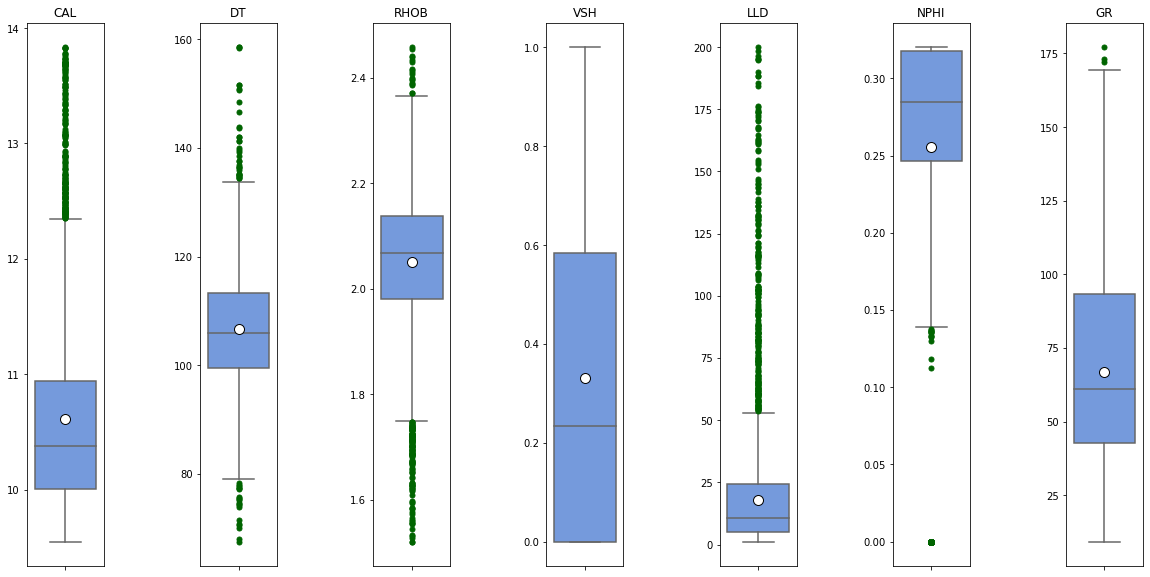

In [10]:
inputs = list(df.columns)
inputs.pop(0) # remove the well name from the columns list

make_boxplot(df, inputs)

In [11]:
# LLD has a high outlier, but this cannot be confirmed without applying the knowledge of the reservoir geology
# (Niger Delta) 
# Use SVM